In [1]:
using QuadraticTeamDecisionSolver, Statistics, LinearAlgebra, Plots

In [40]:
m = 100000;
μ = 0.0;
σ = 1.0;

In [41]:
H(N) = [[sampleComplexNormal(μ, σ, N) for _ in 1:m] for i in 1:2] #only need 2

H (generic function with 1 method)

In [42]:
σᵣ = 10 .^ range(-10, stop=10, length=300);

In [43]:
function bound(N, σ)
    C = H(N)
    B = sqrt(Statistics.mean([abs( dot(h1, h2) / (dot(h1, h1) + σ))^2 for (h1, h2) in zip(C[1], C[2])]))
    return sqrt(N*((N-1)*B)^2)
end

bound (generic function with 1 method)

In [44]:
bounds = [bound.(N, σᵣ) for N in 2:15];

In [51]:
using LaTeXStrings

In [56]:
saveTo = "/home/fe/michelena/Schreibtisch/thesis/progress"

"/home/fe/michelena/Schreibtisch/thesis/progress"

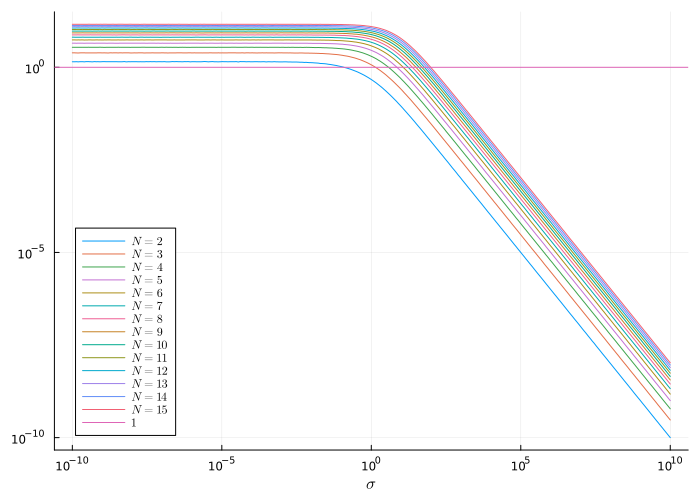

In [61]:
p1 = plot(size=(700,500))
for N in 2:15
    plot!(p1, σᵣ, bounds[N-1], label=latexstring("N = $(N)"), xlabel=L"\sigma", xscale=:log10, yscale=:log10, legend=:bottomleft)
end
hline!(p1, [1], label=L"1")
savefig(saveTo * "/bounds.png");
display(Plots.current())

In [62]:
indeces = [findfirst(x -> x <= 1, b) for b in bounds]

14-element Vector{Int64}:
 137
 153
 160
 164
 167
 169
 172
 173
 175
 176
 178
 179
 180
 181

In [63]:
min_sigmas = [σᵣ[i] for (b,i) in zip(bounds, indeces)]

14-element Vector{Float64}:
   0.12502301459914558
   1.4696843861124462
   4.319679297334174
   7.99852733679671
  12.696351276599735
  17.276596646690365
  27.423765732649496
  31.990182847750656
  43.5307336473189
  50.77917243205401
  69.09790545715646
  80.60361408861345
  94.02517429670132
 109.68160052731379

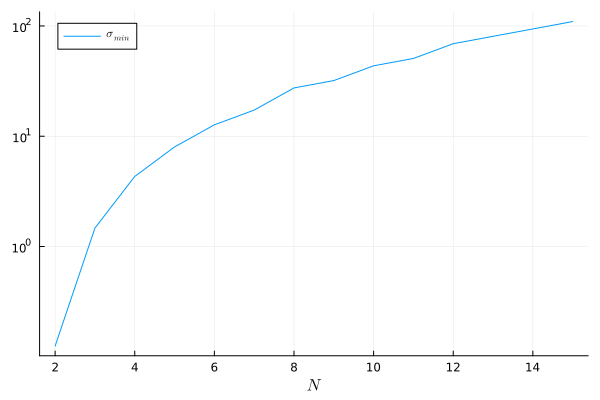

In [64]:
plot(2:15, min_sigmas, yscale=:log10, label=L"\sigma_{min}", xlabel=L"N")
savefig(saveTo * "/minsigma.png");
display(Plots.current())